In [50]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")

In [14]:
df = pd.read_csv("Hitters.csv")
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [16]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [18]:
df["League"].value_counts()

A    175
N    147
Name: League, dtype: int64

In [19]:
df["Division"].value_counts()

W    165
E    157
Name: Division, dtype: int64

In [17]:
df["NewLeague"].value_counts()

A    176
N    146
Name: NewLeague, dtype: int64

In [20]:
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
dms

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
0,1,0,1,0,1,0
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
...,...,...,...,...,...,...
317,0,1,1,0,0,1
318,1,0,1,0,1,0
319,1,0,0,1,1,0
320,1,0,1,0,1,0


In [21]:
df.drop(["League","Division","NewLeague"],axis=1,inplace=True)
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5


In [22]:
df=pd.concat([df,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN,0,0,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1


* kategorik değişkenleri sayısal değişkenlere dönüştürmüş olduk.

In [23]:
#Missing values analysis
df.isna().sum()

AtBat           0
Hits            0
HmRun           0
Runs            0
RBI             0
Walks           0
Years           0
CAtBat          0
CHits           0
CHmRun          0
CRuns           0
CRBI            0
CWalks          0
PutOuts         0
Assists         0
Errors          0
Salary         59
League_N        0
Division_W      0
NewLeague_N     0
dtype: int64

* sadece maaş değişkeninde eksik değerler var.

In [24]:
df.Salary.max()

2460.0

In [25]:
df.Salary.min()

67.5

In [27]:
df["Salary"].value_counts().unique()

array([8, 6, 5, 4, 3, 2, 1], dtype=int64)

In [28]:
df["Salary"].fillna(df.Salary.mean(),inplace=True)

In [31]:
df.isna().sum().sum()

0

* eksik değerleri gidermiş oldum

In [33]:
# outlier query
for i in df:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if df[(df[i] > up) | (df[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

AtBat no
Hits no
HmRun yes
Runs yes
RBI yes
Walks yes
Years yes
CAtBat yes
CHits yes
CHmRun yes
CRuns yes
CRBI yes
CWalks yes
PutOuts yes
Assists yes
Errors yes
Salary yes
League_N no
Division_W no
NewLeague_N no


* aykırı değer olup olmadığını sorguladım

In [34]:
numeric_list=["AtBat",'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'Salary']

In [35]:
for i in numeric_list:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    up_lim = Q3 + 1.5 * IQR
    low_lim = Q1 - 1.5 * IQR
    df.loc[df[i] > up_lim,i] = up_lim
    df.loc[df[i] < low_lim,i] = low_lim


In [36]:
# outlier query
for i in df:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if df[(df[i] > up) | (df[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

AtBat no
Hits no
HmRun no
Runs no
RBI no
Walks no
Years no
CAtBat no
CHits no
CHmRun no
CRuns no
CRBI no
CWalks no
PutOuts no
Assists no
Errors no
Salary no
League_N no
Division_W no
NewLeague_N no


* aykırı değerleri ortadan kaldırmış olduk.alt sınırın altındaki değerleri alt sınırla,üst sınırın üstündeki değerleri üst sınırla değiştirmiş oldum

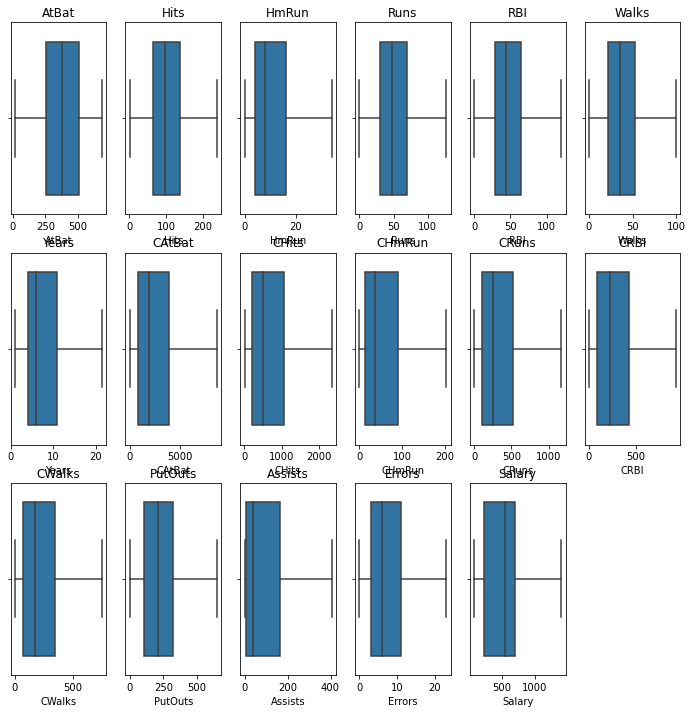

In [37]:
k=1
df_num = df.loc[:,numeric_list]
plt.figure(figsize=(12,12))

for i in df_num:
    plt.subplot(3,6,k)
    sns.boxplot(x = i, data = df_num)
    plt.title(i)
    k+=1


In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,322.0,380.928571,153.404981,16.0,255.25,379.500000,512.00,687.000
Hits,322.0,101.024845,46.454741,1.0,64.00,96.000000,137.00,238.000
HmRun,322.0,10.748447,8.643984,0.0,4.00,8.000000,16.00,34.000
Runs,322.0,50.901009,25.997356,0.0,30.25,48.000000,69.00,127.125
RBI,322.0,48.024457,26.157195,0.0,28.00,44.000000,64.75,119.875
Walks,322.0,38.725155,21.588976,0.0,22.00,35.000000,53.00,99.500
Years,322.0,7.431677,4.887678,1.0,4.00,6.000000,11.00,21.500
CAtBat,322.0,2624.128882,2237.945484,19.0,816.75,1928.000000,3924.25,8585.500
CHits,322.0,708.443323,621.522994,4.0,209.00,508.000000,1059.25,2334.625
CHmRun,322.0,61.462733,63.346598,0.0,14.00,37.500000,90.00,204.000


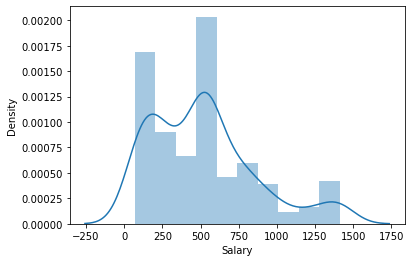

In [42]:
sns.distplot(df["Salary"]);

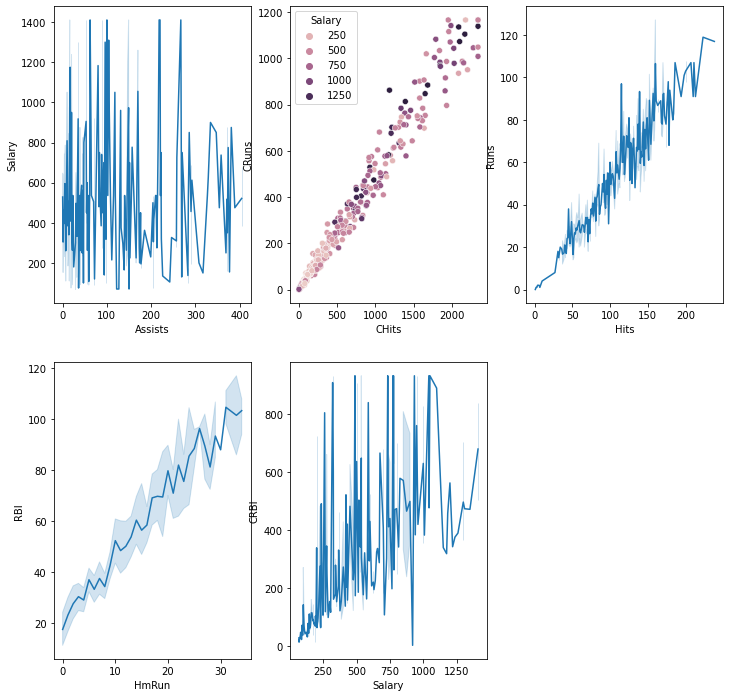

In [43]:
plt.figure(figsize=(12,12))
plt.subplot(2,3,1)
sns.lineplot(x = 'Assists', y = 'Salary', data = df)
plt.subplot(2,3,2)
sns.scatterplot(x = 'CHits', y = 'CRuns', data = df,hue="Salary")
plt.subplot(2,3,3)
sns.lineplot(x = 'Hits', y = 'Runs', data = df)
plt.subplot(2,3,4)
sns.lineplot(x = 'HmRun', y = 'RBI', data = df)
plt.subplot(2,3,5)
sns.lineplot(x = 'Salary', y = 'CRBI', data = df)
plt.show()

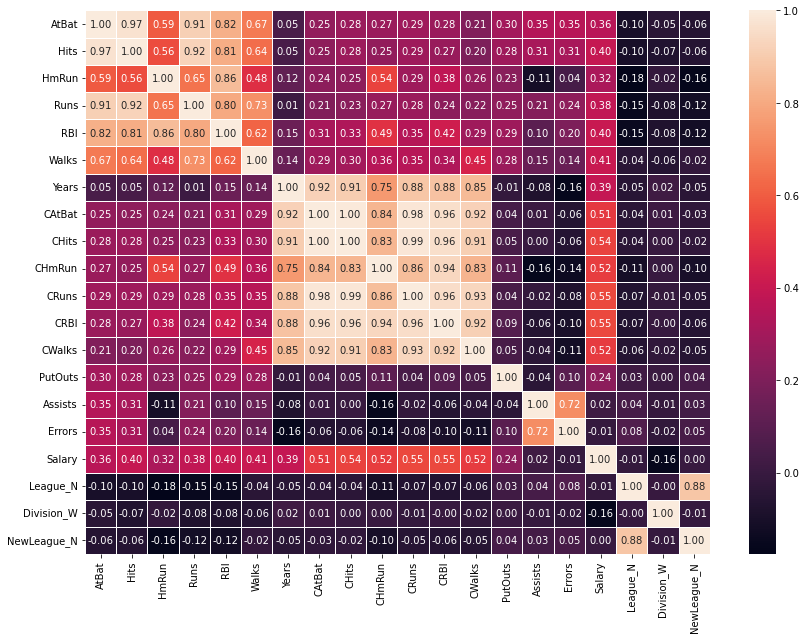

In [44]:
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(),annot=True,fmt=".2f",linewidths=.6);

* böylelikle hangi değişkenin hangi değişkeni daha çok etkilediğini görebiliriz.Mesela en yüksek korelasyon oranı 0.99(CRUNS-CHİTS)yani iki değişkende neredeyse aynı anlamı taşıyor bu tür durumlarda değişkenlerden birini çıkartabiliriz.

In [45]:
X=df.drop("Salary",axis=1)
y=df["Salary"]

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)  

 # Ridge Regressor

* ilgisiz değişkenlere bir ceza uygulayarak katsayılarını sıfıra yaklaştırır.

In [47]:
#ridge model
ridge=Ridge().fit(X_train,y_train)

In [51]:
#primitive test error
y_pred=ridge.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

251.57993908745615

In [52]:
#test error.
r2_score(y_test,y_pred)

0.4677336136272101

In [53]:
#model tuning
alphas=np.linspace(0,100,200)
ridge_cv=RidgeCV(alphas=alphas,normalize=True,cv=10,
                 scoring="neg_mean_squared_error").fit(X_train,y_train)

In [54]:
#optimum params
ridge_cv.alpha_

0.5025125628140703

In [55]:
#ridge tuned 
ridge_tun=Ridge(ridge_cv.alpha_).fit(X_train,y_train)

In [56]:
#Tuned model test failure
y_pred=ridge_tun.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

251.6326587359351

In [57]:
r2_score(y_test,y_pred)

0.46751051287419454

* fazla bir değişiklik olmadı

In [58]:
pd.Series(ridge_tun.coef_,index=X_train.columns)   

AtBat          -0.857813
Hits            2.845531
HmRun           5.271484
Runs           -0.821945
RBI            -0.410725
Walks           2.264230
Years         -21.404485
CAtBat         -0.204384
CHits           0.729037
CHmRun         -0.212815
CRuns           0.454105
CRBI            0.549714
CWalks         -0.091623
PutOuts         0.210620
Assists         0.329790
Errors         -2.731557
League_N       54.921303
Division_W    -77.353763
NewLeague_N   -22.183261
dtype: float64

* bazı değişkenlerin katsayıları sıfıra yaklaşmış oldu..

# Lasso Regressor

* ilgisiz değişkenlerin katsayılarına bir ceza uygulayarak katsayılarını sıfır yapar.(özniteliklerin ağırlıklarını sıfıra doğru baskılar.)

In [59]:
#lasso model
lasso=Lasso().fit(X_train,y_train)

In [60]:
##primitive test error
y_pred=lasso.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

251.11014976826

In [61]:
r2_score(y_test,y_pred)

0.46971961930907813

In [62]:
alp=np.linspace(0,100,300)

In [63]:
#lasso cv.
lasso_cv=LassoCV(alphas=alp).fit(X_train,y_train)

In [64]:
#optimum params
lasso_cv.alpha_

29.431438127090303

In [65]:
#losso tuned
lasso_tun=Lasso(lasso_cv.alpha_).fit(X_train,y_train)

In [66]:
#tun error
y_pred=lasso_tun.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

251.60081010207156

In [67]:
r2_score(y_test,y_pred)

0.4676452965668981

In [68]:
pd.Series(lasso_tun.coef_,index=X_train.columns)   #coefficient values

AtBat         -0.770629
Hits           2.183712
HmRun          0.508124
Runs           0.000000
RBI            1.190716
Walks          1.788356
Years         -7.662535
CAtBat        -0.262872
CHits          0.833528
CHmRun         0.000000
CRuns          0.432189
CRBI           0.472521
CWalks        -0.003810
PutOuts        0.233545
Assists        0.239044
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64

* Görüldüğü gibi 5 katsayısının değeri 0 olmuştur.(Hesaba dahil edilmemiştir)

# Elasticnet Regressor

* elasticnet ridge ve losso yöntemlerini(L1 ve L2)birleştirerek modeli hata yapmaması için usulca terbiye eder.(daha etkin bir düzgünleştirme işlemi yapar.)

In [69]:
#elasticnet model
enet=ElasticNet().fit(X_train,y_train)

In [70]:
#primitive test error
y_pred=enet.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

251.32290653439406

In [71]:
alph=np.linspace(0,100,400)
#enet tuned
enet_cv=ElasticNetCV(alphas=alp).fit(X_train,y_train)

In [72]:
#optimum alpha
enet_cv.alpha_

100.0

In [73]:
#modeltuning
enet_tun=ElasticNet(alpha=enet_cv.alpha_).fit(X_train,y_train)

In [74]:
#tun error
y_pred=lasso_tun.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

251.60081010207156

In [75]:
pd.Series(enet_tun.coef_,index=X_train.columns)   #coefficient values

AtBat         -0.405703
Hits           1.143910
HmRun          0.035671
Runs           0.475268
RBI            0.984188
Walks          1.204964
Years         -0.000000
CAtBat        -0.312700
CHits          0.950314
CHmRun         0.011601
CRuns          0.396216
CRBI           0.484349
CWalks         0.061670
PutOuts        0.242674
Assists        0.228601
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64

# KNN Regressor

In [76]:
#knn model
knn=KNeighborsRegressor().fit(X_train,y_train)  

In [77]:
#primitive test error
y_pred=knn.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

267.28443460822217

* knn primitif test hatamız diğer modellere göre daha başarılı oldu (hata düşük)

In [78]:
#knn params 
knn_params={
    "n_neighbors":np.arange(1,13),
    "weights":["uniform","distance"],
    "metric":["manhattan","minkowski"]
}

In [79]:
#gridsearchcv
knn_cv=GridSearchCV(knn,knn_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [80]:
#best params
knn_cv.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}

In [81]:
#knn tun
knn_tun=KNeighborsRegressor(metric="manhattan",n_neighbors=11,
                            weights="distance").fit(X_train,y_train)

In [82]:
#tun error
y_pred=knn_tun.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

250.08880380069192

* şuana kadar ki en düşük hatayı yakalamış oldum

# standardization process for knn

In [83]:
X=df.drop("Salary",axis=1)
y=df["Salary"]

In [84]:
scaler=StandardScaler()

In [85]:
X[numeric_list[:-1]]=scaler.fit_transform(X[numeric_list[:-1]])

In [86]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
0,-0.574071,-0.755130,-1.129528,-0.805218,-0.728445,-1.147050,-1.317944,-1.043259,-1.035269,-0.955960,-1.023264,-0.995402,-1.036449,1.048770,-0.548569,1.977149,0,0,0
1,-0.430437,-0.431732,-0.434323,-1.036370,-0.383835,0.012751,1.345945,0.369158,0.203940,0.119170,-0.104901,0.362791,0.581890,2.060357,-0.471233,0.336742,1,1,1
2,0.640293,0.624699,0.840219,0.581693,0.918021,1.729256,-0.908115,-0.447592,-0.405190,0.024305,-0.411022,-0.159320,0.079802,2.150774,-0.169623,0.992905,0,1,0
3,0.751283,0.861858,1.071954,0.543168,1.147761,-0.080033,0.731201,1.344334,1.396417,2.253619,1.495133,1.858568,0.487749,-0.289135,-0.718708,-0.811543,1,0,1
4,-0.391264,-0.302373,-0.086721,-0.458490,-0.230676,-0.404778,-1.113030,-0.997163,-0.978868,-0.782042,-0.966458,-0.935430,-0.951273,2.150774,-0.494434,-0.647502,1,0,1


In [87]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)  

In [88]:
knn=KNeighborsRegressor().fit(X_train,y_train)  

In [89]:
#knn params 
knn_params={
    "n_neighbors":np.arange(1,13),
    "weights":["uniform","distance"],
    "metric":["manhattan","minkowski"]
}

In [90]:
#gridsearchcv
knn_cv=GridSearchCV(knn,knn_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


In [91]:
knn_cv.best_params_

{'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}

In [92]:
knn_tun=KNeighborsRegressor(**knn_cv.best_params_).fit(X_train,y_train)

In [93]:
#tun error
y_pred=knn_tun.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

232.03826362403686

* standarlaştırma işlemleri sonunda knn hatası düştü.